# 1. Introduction
## 1.1 Problem Statement: 
Heart disease is one of the leading causes of death worldwide. Detecting it early can significantly increase the chances of successful treatment. However, accurately predicting heart disease is a complex task due to the wide range of risk factors involved, such as age, cholesterol levels, blood pressure, and lifestyle habits. Traditional diagnostic methods often rely heavily on medical tests, which can be time-consuming, costly, and sometimes invasive.

The problem this project seeks to address is: How can we leverage patient data, such as clinical metrics and lifestyle attributes, to predict the likelihood of heart disease using machine learning models, in order to provide early and accurate detection?

## 1.2 Objective: 
The aim of this project is to build a reliable and efficient machine learning classification model that can predict whether a patient is at risk of heart disease. By analyzing key health indicators like blood pressure, cholesterol, heart rate, and more, the model will assist healthcare providers in identifying high-risk patients and intervening before serious conditions arise.

**Key objectives include:**

* Exploring and preprocessing the dataset to ensure quality data for model training.
* Selecting and evaluating appropriate machine learning algorithms for classification.
* Comparing model performance using metrics such as accuracy, precision, recall, and F1-score.
* Identifying the most important features contributing to heart disease prediction, providing interpretability for medical professionals.
* This project aims to support early-stage diagnosis and help healthcare systems make more data-driven, proactive decisions regarding heart disease prevention and treatment.

# 2. Data Collection
The dataset is sourced from Kaggle. It contains clinical and demographic data that can be used to predict heart disease.

Dataset link: https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction

# 3. Data Description


### 3.1 Dataset Description
This dataset provides a comprehensive overview of individuals’ demographic, lifestyle, and medical information related to their risk factors for heart disease. It contains key variables such as age, cholesterol, blood pressure, and symptoms commonly associated with cardiovascular conditions. The target variable indicates whether or not an individual has been diagnosed with heart disease.

### 3.2 Column Descriptions

| **Column**                   | **Description**                                                                 |
|-------------------------------|---------------------------------------------------------------------------------|
| **Age**                       | Age of the individual in years.                                                 |
| **Gender**                    | Gender of the individual (Male/Female).                                         |
| **Cholesterol**               | Cholesterol level in mg/dL.                                                     |
| **Blood Pressure**            | Systolic blood pressure in mmHg.                                                |
| **Heart Rate**                | Heart rate in beats per minute (bpm).                                           |
| **Smoking**                   | Smoking status (Never/Former/Current).                                          |
| **Alcohol Intake**            | Frequency of alcohol intake (None/Moderate/Heavy).                              |
| **Exercise Hours**            | Number of hours exercised per week.                                             |
| **Family History**            | Whether there is a family history of heart disease (Yes/No).                    |
| **Diabetes**                  | Diabetes diagnosis status (Yes/No).                                             |
| **Obesity**                   | Obesity status (Yes/No).                                                        |
| **Stress Level**              | Self-reported stress level, measured on a scale of 1 to 10.                     |
| **Blood Sugar**               | Fasting blood sugar level in mg/dL.                                             |
| **Exercise Induced Angina**    | Whether the individual experiences angina triggered by exercise (Yes/No).       |
| **Chest Pain Type**           | Type of chest pain experienced (Typical Angina/Atypical Angina/Non-anginal Pain/Asymptomatic). |
| **Heart Disease** (Target)    | Presence of heart disease (0 = No, 1 = Yes).                                    |




# 4. Data Preprocessing and Cleaning

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
heart_disease_df = pd.read_csv('heart_disease_dataset.csv')
heart_disease_df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,None,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,None,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,None,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [3]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           1000 non-null   object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [4]:
heart_disease_df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


## 4.1 Handling Missing Data:

In [5]:
heart_disease_df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

**No Missing Values:** 
    - The dataset is complete with no missing or null values in any of the columns. This ensures that no imputation or deletion steps are necessary during the preprocessing phase.
    
## 4.2 Outlier Detection: Mention how outliers were handled.


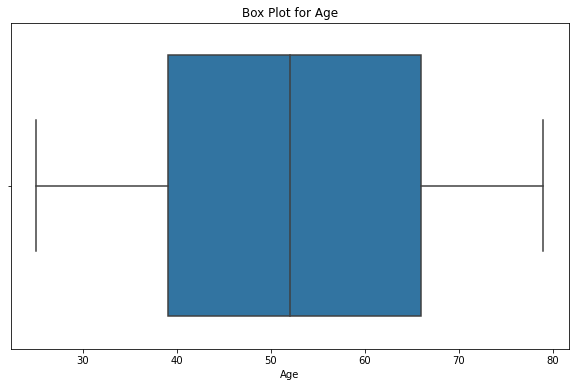

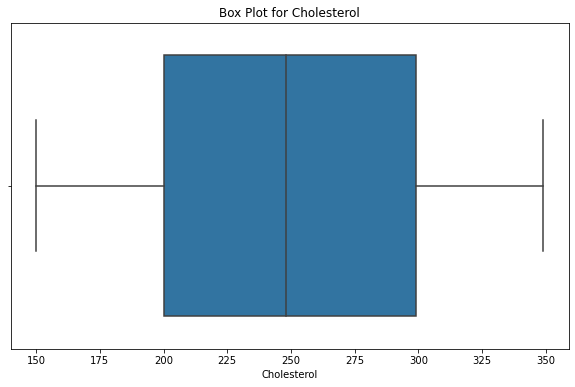

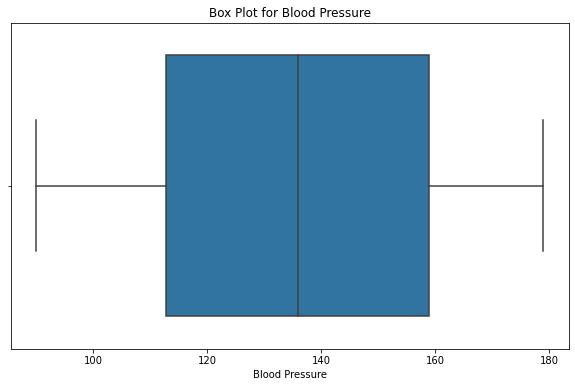

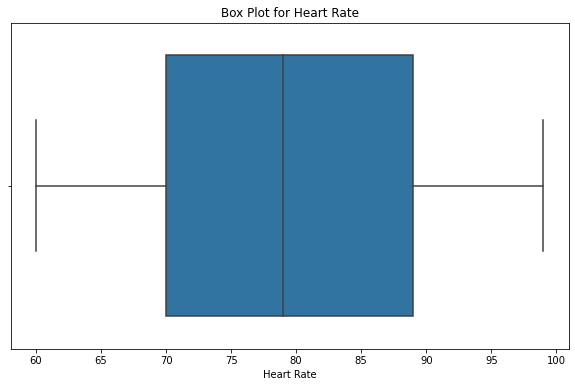

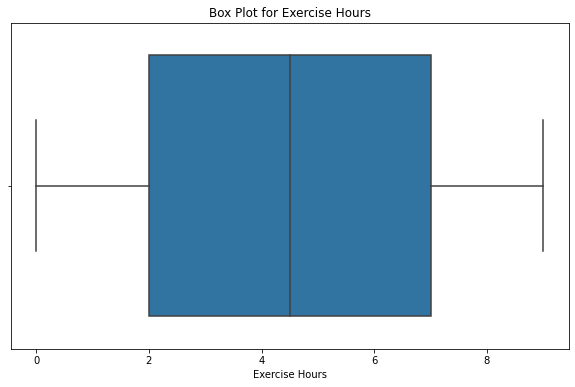

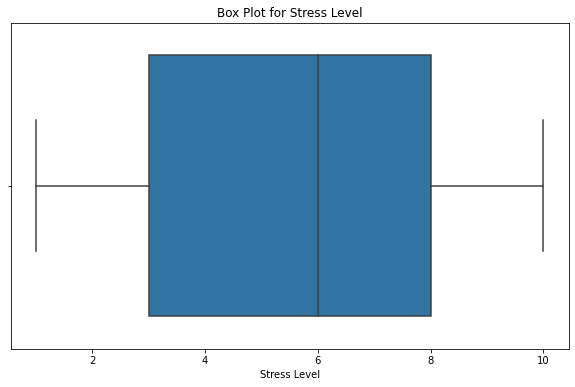

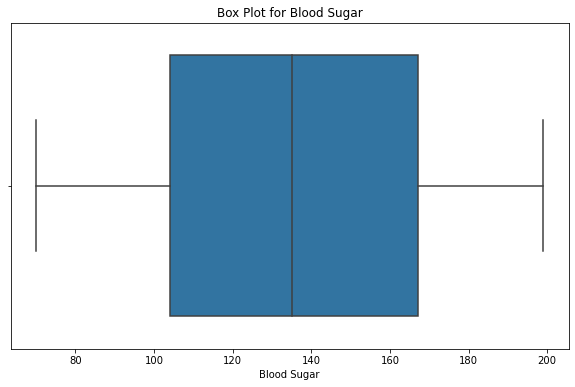

In [6]:
# List of numerical columns
numerical_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']

# Plot box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=heart_disease_df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

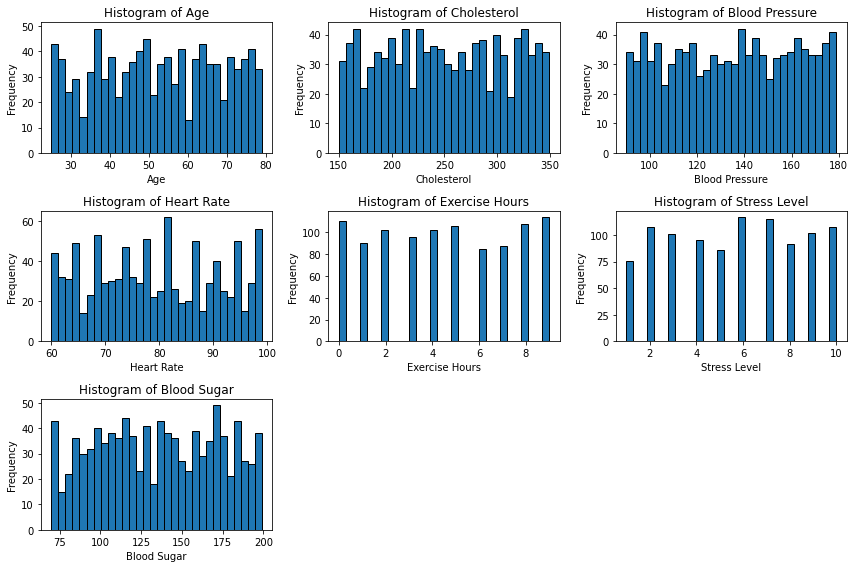

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(heart_disease_df[col], bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**No Outliers:** This dataset does not have outliers.

# 5. Exploratory Data Analysis (EDA)

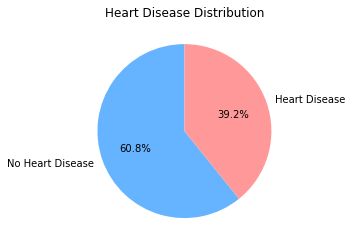

In [8]:
# Pie Chart for Heart Disease
heart_disease_df['Heart Disease'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], labels=['No Heart Disease', 'Heart Disease'])
plt.title('Heart Disease Distribution')
plt.ylabel('')  # Removes the y-label for aesthetics
plt.show()


The dataset used for heart disease prediction contains an imbalance in the target variable. Specifically:

- 60.28% of the individuals do not have heart disease.
- 39.2% of the individuals have heart disease.

Although this represents a moderate class imbalance, it is not extreme. As a result, I have chosen not to apply any resampling techniques at this stage. However, this imbalance could affect model performance, particularly in detecting individuals with heart disease. The impact of this imbalance will be evaluated during model training and testing, with a focus on metrics such as precision, recall, and F1-score to ensure balanced model performance across both classes.

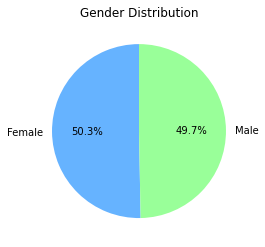

In [9]:
# Pie Chart for Gender
heart_disease_df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Gender Distribution')
plt.ylabel('')  # Removes y-label for better aesthetics
plt.show()

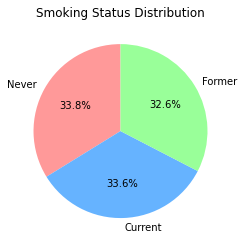

In [10]:
# Pie Chart for Smoking
heart_disease_df['Smoking'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Smoking Status Distribution')
plt.ylabel('')
plt.show()


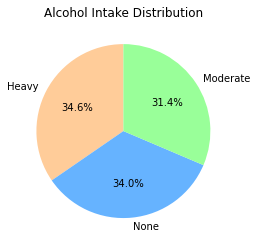

In [11]:
# Pie Chart for Alcohol Intake
heart_disease_df['Alcohol Intake'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#66b3ff','#99ff99'])
plt.title('Alcohol Intake Distribution')
plt.ylabel('')
plt.show()


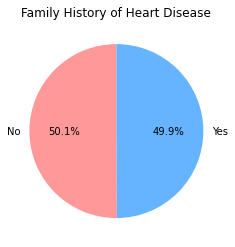

In [12]:
# Pie Chart for Family History
heart_disease_df['Family History'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Family History of Heart Disease')
plt.ylabel('')
plt.show()


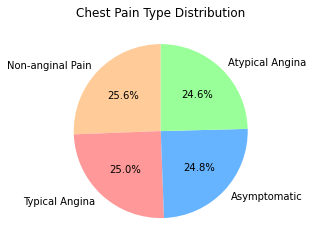

In [13]:
# Pie Chart for Chest Pain Type
heart_disease_df['Chest Pain Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#ff9999','#66b3ff','#99ff99'])
plt.title('Chest Pain Type Distribution')
plt.ylabel('')
plt.show()


The following observations can be made based on the categorical variables:

- **Gender Distribution:**

The dataset is balanced in terms of gender, with 50.3% female and 49.7% male. This suggests that gender is unlikely to introduce bias into the model, allowing for fair evaluation of heart disease risk between males and females.

- **Smoking Status:**
The smoking status is almost evenly distributed across the three categories:

 - 33.8% never smoked
 - 32.6% are former smokers
 - 33.6% are current smokers

Given the near equal distribution, smoking status could be a relevant predictor for heart disease, as both current and former smokers represent a significant portion of the data.

- **Alcohol Intake:**

The alcohol intake categories are also fairly balanced:

 - 34.6% heavy drinkers
 - 31.6% moderate drinkers
 - 34.0% non-drinkers
 
Since heavy and moderate drinkers make up a substantial part of the dataset, alcohol consumption patterns might contribute significantly to heart disease risk.

- **Family History of Heart Disease:**
There is a near 50-50 split between individuals with and without a family history of heart disease (50.1% no, 49.9% yes). This indicates that family history might play a key role in predicting heart disease, as both groups are well-represented in the dataset.

- **Chest Pain Type:**
The distribution of chest pain types is evenly spread across four categories:

 - 25.6% non-anginal pain
 - 24.6% atypical angina
 - 25.0% typical angina
 - 24.8% asymptomatic
The even distribution of chest pain types suggests that this feature will provide valuable information in distinguishing individuals with heart disease from those without it.

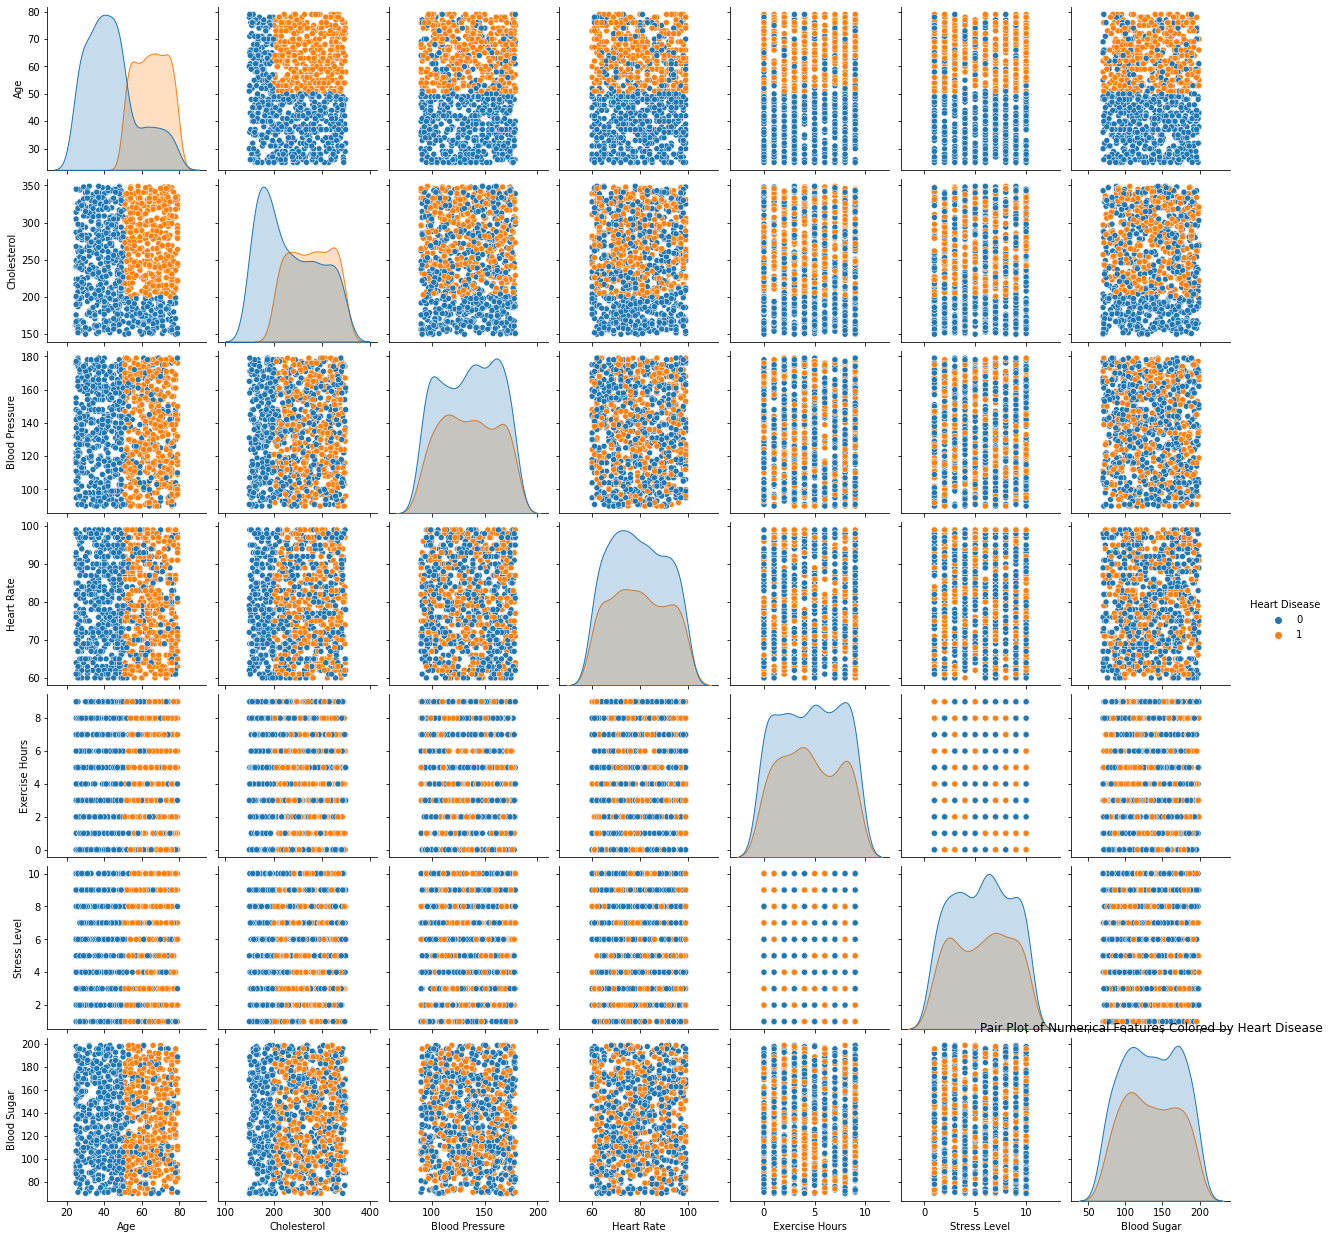

In [14]:
# Pair Plot for numerical features, colored by 'Heart Disease'
sns.pairplot(heart_disease_df, hue='Heart Disease', vars=['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar'])
plt.title('Pair Plot of Numerical Features Colored by Heart Disease')
plt.show()

From the pair plot of numerical features, the following insights are derived:

- Age:
There is a noticeable pattern where individuals with heart disease tend to be above the age of 50. This indicates that increasing age is a significant risk factor for heart disease.

- Cholesterol:
Individuals with heart disease generally have cholesterol levels above 200 mg/dL, suggesting a strong correlation between high cholesterol and heart disease.

- Other Features:
While blood pressure, heart rate, exercise hours, stress level, and blood sugar do not exhibit clear or strong clustering or separation in the pair plot, they may still contribute to heart disease prediction in combination with other features. These features appear more scattered and might require further analysis through model training to evaluate their predictive power.

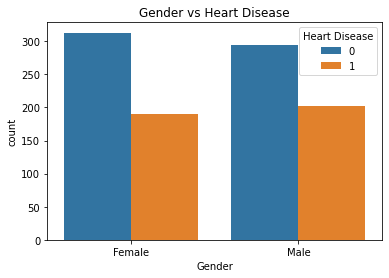

In [15]:
sns.countplot(x='Gender', hue='Heart Disease', data=heart_disease_df)
plt.title('Gender vs Heart Disease')
plt.show()

Both genders show a relatively even distribution for heart disease, with no stark difference between males and females. This suggests that gender may not be a strong standalone indicator for heart disease in this dataset.

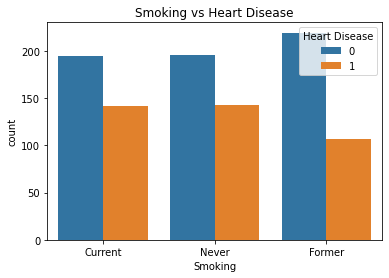

In [16]:
sns.countplot(x='Smoking', hue='Heart Disease', data=heart_disease_df)
plt.title('Smoking vs Heart Disease')
plt.show()


 Smoking status does appear to show some variation in heart disease occurrence, with former smokers being less likely to have heart disease than current smokers. It might suggest that smoking is a moderate risk factor, but quitting might improve heart health.

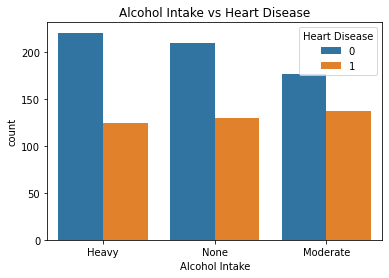

In [17]:
sns.countplot(x='Alcohol Intake', hue='Heart Disease', data=heart_disease_df)
plt.title('Alcohol Intake vs Heart Disease')
plt.show()


Heavy and non-drinkers seem to have comparable distributions for heart disease, while moderate drinkers have a relatively higher chance of heart disease compared to the others. However, this finding may require more context, as drinking behavior could be influenced by other lifestyle or health factors not immediately visible from this chart.

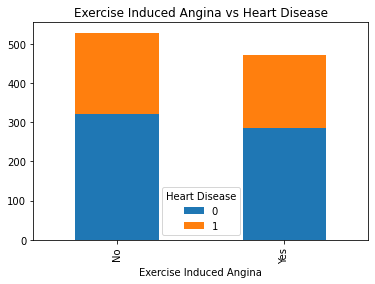

In [18]:
cross_tab = pd.crosstab(heart_disease_df['Exercise Induced Angina'], heart_disease_df['Heart Disease'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Exercise Induced Angina vs Heart Disease')
plt.show()


Exercise-induced angina shows a strong correlation with heart disease, as individuals experiencing angina during exercise are more likely to have heart disease compared to those who do not. This makes it a crucial risk factor and a significant predictor for heart disease, highlighting its importance in predictive modeling.

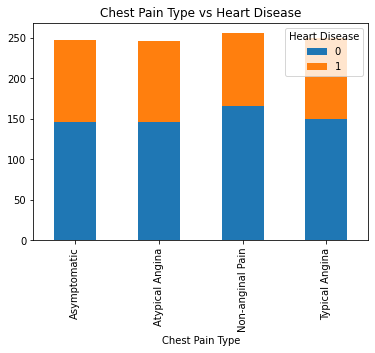

In [19]:
cross_tab = pd.crosstab(heart_disease_df['Chest Pain Type'], heart_disease_df['Heart Disease'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()


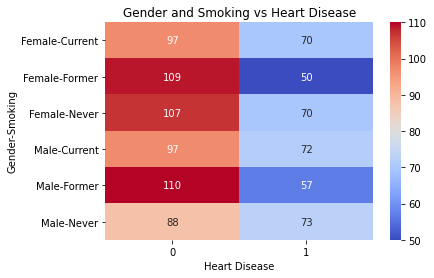

In [20]:
cross_tab = pd.crosstab([heart_disease_df['Gender'], heart_disease_df['Smoking']], heart_disease_df['Heart Disease'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Gender and Smoking vs Heart Disease')
plt.show()


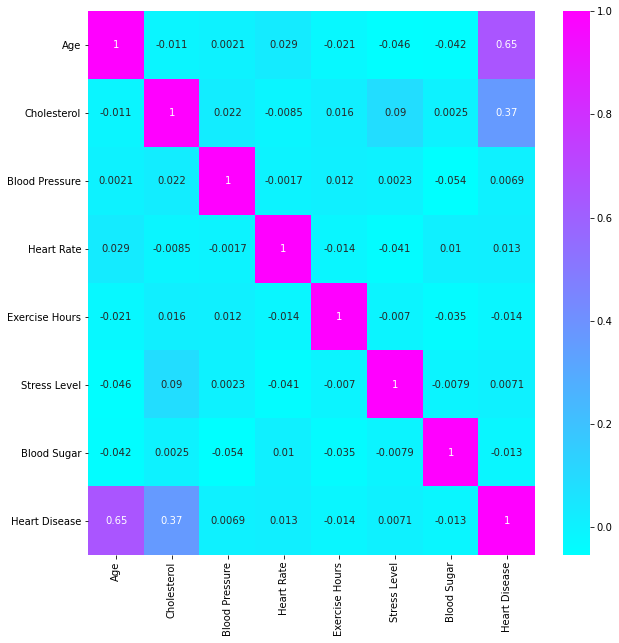

In [21]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(heart_disease_df.corr(), annot=True, cmap='cool')

- There is a strong correlation between age and heart disease. This indicates that increasing age is a significant risk factor for heart disease.Also it is to be noted that there is a medium level correlation between heart disease and cholestrol. There is also a small positive correlation between cholestrol and stress.

- While blood pressure, heart rate, exercise hours, stress level, and blood sugar do not exhibit strong correlation, they may still contribute to heart disease prediction in combination with other features. 

# 6. Feature Engineering

## 6.2 Encoding Categorical Data

In [22]:
# One-Hot Encoding for nominal categorical features
df_encoded = pd.get_dummies(heart_disease_df, columns=[
    'Gender', 
    'Smoking', 
    'Family History', 
    'Diabetes', 
    'Obesity', 
    'Exercise Induced Angina', 
    'Chest Pain Type'
])

# Ordinal Encoding for ordinal categorical features
# Define the order of categories
ordinal_categories = {
    'Alcohol Intake': ['None', 'Moderate', 'Heavy']
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories['Alcohol Intake']])
df_encoded['Alcohol Intake_encoded'] = ordinal_encoder.fit_transform(heart_disease_df[['Alcohol Intake']])

# Drop the original 'Alcohol Intake' column if needed
df_encoded = df_encoded.drop('Alcohol Intake', axis=1)

heart_disease_df = df_encoded
# Check the result
print(heart_disease_df.head())

   Age  Cholesterol  Blood Pressure  Heart Rate  Exercise Hours  Stress Level  \
0   75          228             119          66               1             8   
1   48          204             165          62               5             9   
2   53          234              91          67               3             5   
3   69          192              90          72               4             7   
4   62          172             163          93               6             2   

   Blood Sugar  Heart Disease  Gender_Female  Gender_Male  ...  Diabetes_Yes  \
0          119              1              1            0  ...             0   
1           70              0              0            1  ...             0   
2          196              1              0            1  ...             0   
3          107              0              1            0  ...             1   
4          183              0              1            0  ...             1   

   Obesity_No  Obesity_Yes  Exer

## 6.3 Normalization/ Scaling

In [23]:
X=heart_disease_df.drop(columns=['Heart Disease'])
y=heart_disease_df['Heart Disease']

In [24]:
X = StandardScaler().fit_transform(X)

From the heatmap it is to be observed that there is no multicollinearity in the data. Therefore, dimensionality reduction is not required as it will not offer any benifits. In fact it could even lead to a loss of important information, especially if original features are meaningful.

# 7. Model Selection

- In this analysis, logistic regression is selected due to the binary nature of the outcome variable (presence or absence of heart disease), which aligns perfectly with the logistic regression framework. 
- The model allows for the inclusion of both continuous and categorical predictors, providing an interpretable output in the form of odds ratios.
- Additionally, preliminary analyses indicate no multicollinearity among the independent variables, and the linearity in the logit assumption holds, reinforcing the appropriateness of logistic regression for our dataset. 
- Lastly, logistic regression's computational efficiency and established evaluation metrics make it an ideal choice for this predictive modeling task.

In [25]:
X = heart_disease_df.drop(columns=['Heart Disease'])  # Drop the target column
y = heart_disease_df['Heart Disease'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### 7.1 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 7.2 Support Vector Machine

In [39]:
from sklearn.svm import SVC

# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

#### 7.3 Linear Discriminant Analysis

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_predictions = lda_model.predict(X_test)

# 8. Model Training and Evaluation

#### 8.1 Logistic Regression

In [29]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_predictions))
print(classification_report(y_test, log_predictions))

Logistic Regression Accuracy: 0.835
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       118
           1       0.80      0.80      0.80        82

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



Validation Accuracy: 0.835
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       118
           1       0.80      0.80      0.80        82

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

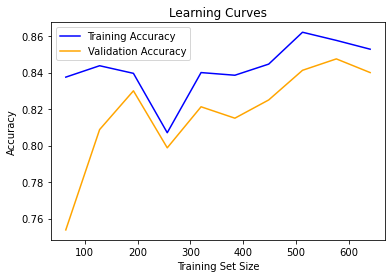

In [30]:
# Validation Predictions
val_predictions = log_model.predict(X_val)

# Accuracy and classification report for validation set
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# 2. Plot Learning Curves
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', 
                                                           train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curve(log_model, X_train, y_train)


#### 8.2 Support Vector Machine

In [40]:
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.935
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       118
           1       0.97      0.87      0.92        82

    accuracy                           0.94       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.94      0.93       200



Validation Accuracy: 0.935
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       118
           1       0.97      0.87      0.92        82

    accuracy                           0.94       200
   macro avg       0.94      0.92      0.93       200
weighted avg       0.94      0.94      0.93       200



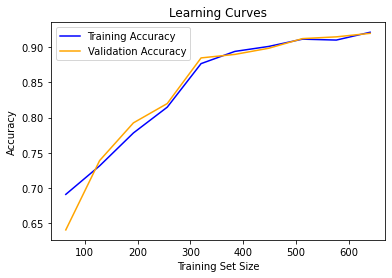

In [32]:
# Validation Predictions
val_predictions = svm_model.predict(X_val)

# Accuracy and classification report for validation set
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# 2. Plot Learning Curves
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', 
                                                           train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curve(svm_model, X_train, y_train)

#### 8.3 Linear Discriminant Analysis

In [33]:
print("LDA Accuracy:", accuracy_score(y_test, lda_predictions))
print(classification_report(y_test, lda_predictions))

LDA Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       118
           1       0.83      0.83      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



Validation Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       118
           1       0.83      0.83      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



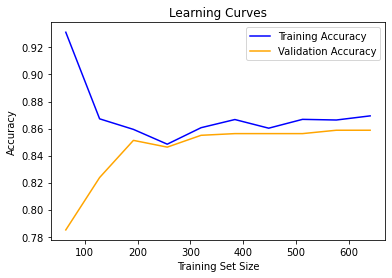

In [34]:
# Validation Predictions
val_predictions = lda_model.predict(X_val)

# Accuracy and classification report for validation set
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

# 2. Plot Learning Curves
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', 
                                                           train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='orange')
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curve(lda_model, X_train, y_train)

## 9. Final Model

To find the best model for the classification task, Logistic Regression, Support Vector Machines (SVM), and Linear Discriminant Analysis (LDA) was evaluated. The performance of these models was assessed using key metrics: accuracy, precision, recall, and the F1-score for both classes, with particular attention to Class 1 (the minority class).

| **Model**         | **Accuracy** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-Score (Class 1)** |
|-------------------|--------------|-------------------------|----------------------|------------------------|
|Logistic Regression| 0.835        | 0.80                    | 0.80                 |0.80                    |
|SVM                | 0.935        | 0.97                    | 0.87                 |0.92                    |
|LDA                | 0.86         | 0.83                    | 0.83                 |0.83                    |




From the table above, **SVM** achieved the **highest accuracy** of **0.935** and a strong **F1-score** of **0.92** for **class 1**, indicating that it strikes a **good balance** between **precision** and **recall**. This makes it the most suitable model for our problem. Moreover, SVM generalizes well to unseen data without signs of overfitting, as seen in the close validation and test accuracies.

Thus, SVM was chosen as the final model due to its superior performance across all evaluation metrics.



# 10. Model Interpretation

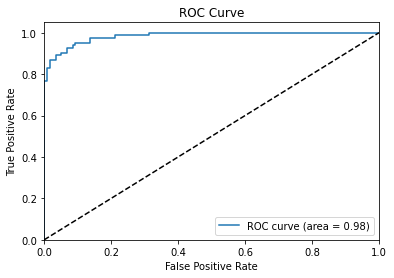

AUC Score:  0.9838776353865233


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class (e.g., heart disease)
y_pred_proba = svm_model.decision_function(X_test)  # Use predict_proba for LogisticRegression

# Calculate FPR, TPR, and thresholds for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score: ", auc_score)

The ROC curve, with an AUC of 0.98, demonstrates that the model is highly reliable. It achieves a near-perfect balance between true positives and false positives, correctly identifying the positive class 98% of the time. This high AUC value reflects the model’s excellent ability to distinguish between the positive and negative classes.

**In terms of classification performance:**(From section 8.2)

- Precision (0.91) and Recall (0.98) for class 0 (negative class) show that the model is very good at identifying true negatives while avoiding false positives.
- For class 1 (positive class), the precision is 0.97, and recall is 0.87, indicating a strong ability to identify true positives, though with some reduction in recall compared to class 0. The overall F1-scores demonstrate strong performance across both classes.

These results indicate a well-balanced model that handles both positive and negative classifications effectively, particularly in medical contexts where identifying the positive cases (e.g., predicting disease) is critical.

**The model's training and validation accuracy analysis shows a healthy learning curve:**(From section 8.2)

Initial overfitting was observed, as the training accuracy was significantly higher than the validation accuracy in the earlier stages. However, as more data was introduced (around 600 samples), the gap between training and validation accuracy closed, indicating that the model generalized better with additional data.

The convergence of training and validation accuracy towards the end of the curve suggests that the model is not overfitting, but rather generalizing well to unseen data. This is a positive outcome and implies that the model can perform consistently on new data.

With validation accuracy reaching 0.935, the model shows excellent generalization, confirming its robustness across both the training and validation datasets.

In [42]:
import shap

# Reduce the background sample size using random sampling
X_train_sampled = shap.sample(X_train, 100)  # Choose 100 samples

# Create a SHAP explainer with the sampled background data
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train_sampled)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)



  0%|          | 0/200 [00:00<?, ?it/s]

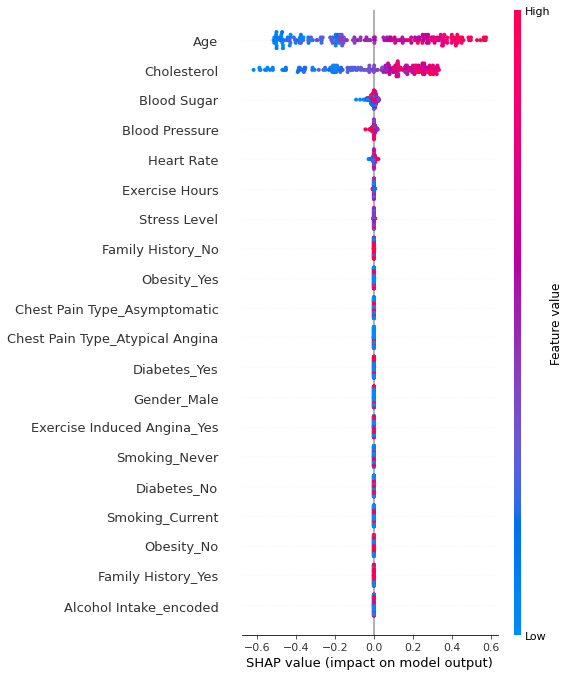

In [43]:
shap.summary_plot(shap_values[1], X_test)

The SHAP (SHapley Additive exPlanations) summary plot offers clear insights into how various features impact the model's predictions:

- Age, Cholesterol, and Blood Sugar are identified as the most important features influencing the model's output, which is consistent with domain knowledge in healthcare. Higher values of these features (represented by the red points) push the model towards a higher prediction, suggesting an increased risk of the target condition (e.g., heart disease).

- Age: Older individuals contribute positively to the prediction of the target variable, indicating that increased age correlates with higher risk.

- Cholesterol & Blood Sugar: Elevated levels of cholesterol and blood sugar are associated with higher SHAP values, further confirming that these factors are crucial in risk prediction.

- Heart Rate shows a more neutral distribution around 0 SHAP value, suggesting a relatively smaller contribution to the model’s prediction.

- Exercise Hours and Smoking have intuitive impacts: lower exercise hours (blue points) increase the predicted risk, while higher values decrease it. Similarly, smoking presence is associated with increased risk.

This SHAP analysis reveals that the model relies heavily on age, cholesterol, and blood sugar levels to make predictions, while exercise and lifestyle factors like smoking also play significant roles.

# 11. Conclusion
Based on the SHAP plot, ROC curve, and validation results:

- The model effectively identifies critical features influencing predictions and provides reliable classification performance, as evidenced by the high AUC score and balanced precision-recall values.
- The convergence of training and validation accuracy further confirms that the model generalizes well, avoiding overfitting.
- Key features such as Age, Cholesterol, and Blood Sugar drive the model's predictions, aligning with medical expectations, making this model particularly useful for health-related risk assessments.
# 12. References
- https://www.sciencedirect.com/science/article/pii/S2352914820300125
- https://medium.com/analytics-vidhya/everything-you-need-about-evaluating-classification-models-dfb89c60e643
- https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models